### Capstone project

### Stroke prediction dataset

                                        Submitted by,
                                        Renjini R V
                                        

#### Contents
1. Exploratory data analysis
2. Data visualisation
3. Box plot of numerical columns and their outlier treatment
4. Outlier capping
5. Scaling the features
6. Label encoding
7. Modelling the dataset

#### Problem- To findout which factors majorly contribute to stroke disease.

#### Objective-to predict whether a patient is likely to suffer a stroke based on input parameters such as gender, age, smoking status etc.

#### contains info about patients including demographics, lifestyle factors to predict stroke risk
#### demographic factors - gender age residence work type
#### life style factors-  avg glucose level, bmi, hypertension

#### dataset source- Kaggle. datset consists of 5110  observations(rows), each represents a patient. There are 12  columns or attributes.Target variable- stroke. 

In [683]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [684]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [685]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### 1.Exploratory data analysis
      

In [686]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [687]:
data.shape

(5110, 12)

In [688]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [689]:
# Drop ID column if not necessary for analysis
data = data.drop(columns=['id'], errors='ignore')

In [690]:
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Categorical Columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


##### The dataset contains 5,110 entries and 12 columns.
##### Numerical Columns:

##### age, hypertension, heart_disease, avg_glucose_level, bmi, stroke
##### Categorical Columns:

##### gender, ever_married, work_type, Residence_type, smoking_status

In [691]:
# Descriptive statistics for numerical columns
print(data[numerical_cols].describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


In [692]:
# Check for null values
print("\nNull Values in Each Column:")
print(data.isnull().sum())


Null Values in Each Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


##### The bmi column has some missing values, with only 4,909 non-null entries.(201 null values)
##### The dataset includes unique patient IDs in the id column, which can be dropped for analysis purposes if it's not essential.

In [693]:
# Handle missing values in 'bmi' by filling with median (or other strategies as needed)
data['bmi'].fillna(data['bmi'].median(), inplace=True)

In [694]:
print("\nNull Values in Each Column:")
print(data.isnull().sum())


Null Values in Each Column:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [695]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [696]:
# Skewness and kurtosis for numerical columns##### explain skewness and kurtosis
print("\nSkewness of numerical columns:")
print(data[numerical_cols].skew())
print("\nKurtosis of numerical columns:")
print(data[numerical_cols].kurt())


Skewness of numerical columns:
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.088187
stroke               4.193284
dtype: float64

Kurtosis of numerical columns:
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.635306
stroke               15.589736
dtype: float64


### 2.Visualisation 

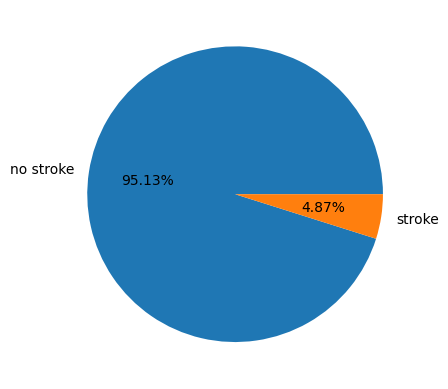

In [697]:
##### shows the percentage of stroke in dataset 
pie_df=pd.DataFrame(data.groupby('stroke')['stroke'].count())
plt.pie(pie_df['stroke'], labels=['no stroke', 'stroke'], autopct='%.2f%%', radius=1)
plt.show()


##### The plot shows only 4 percentage are affected by stroke 

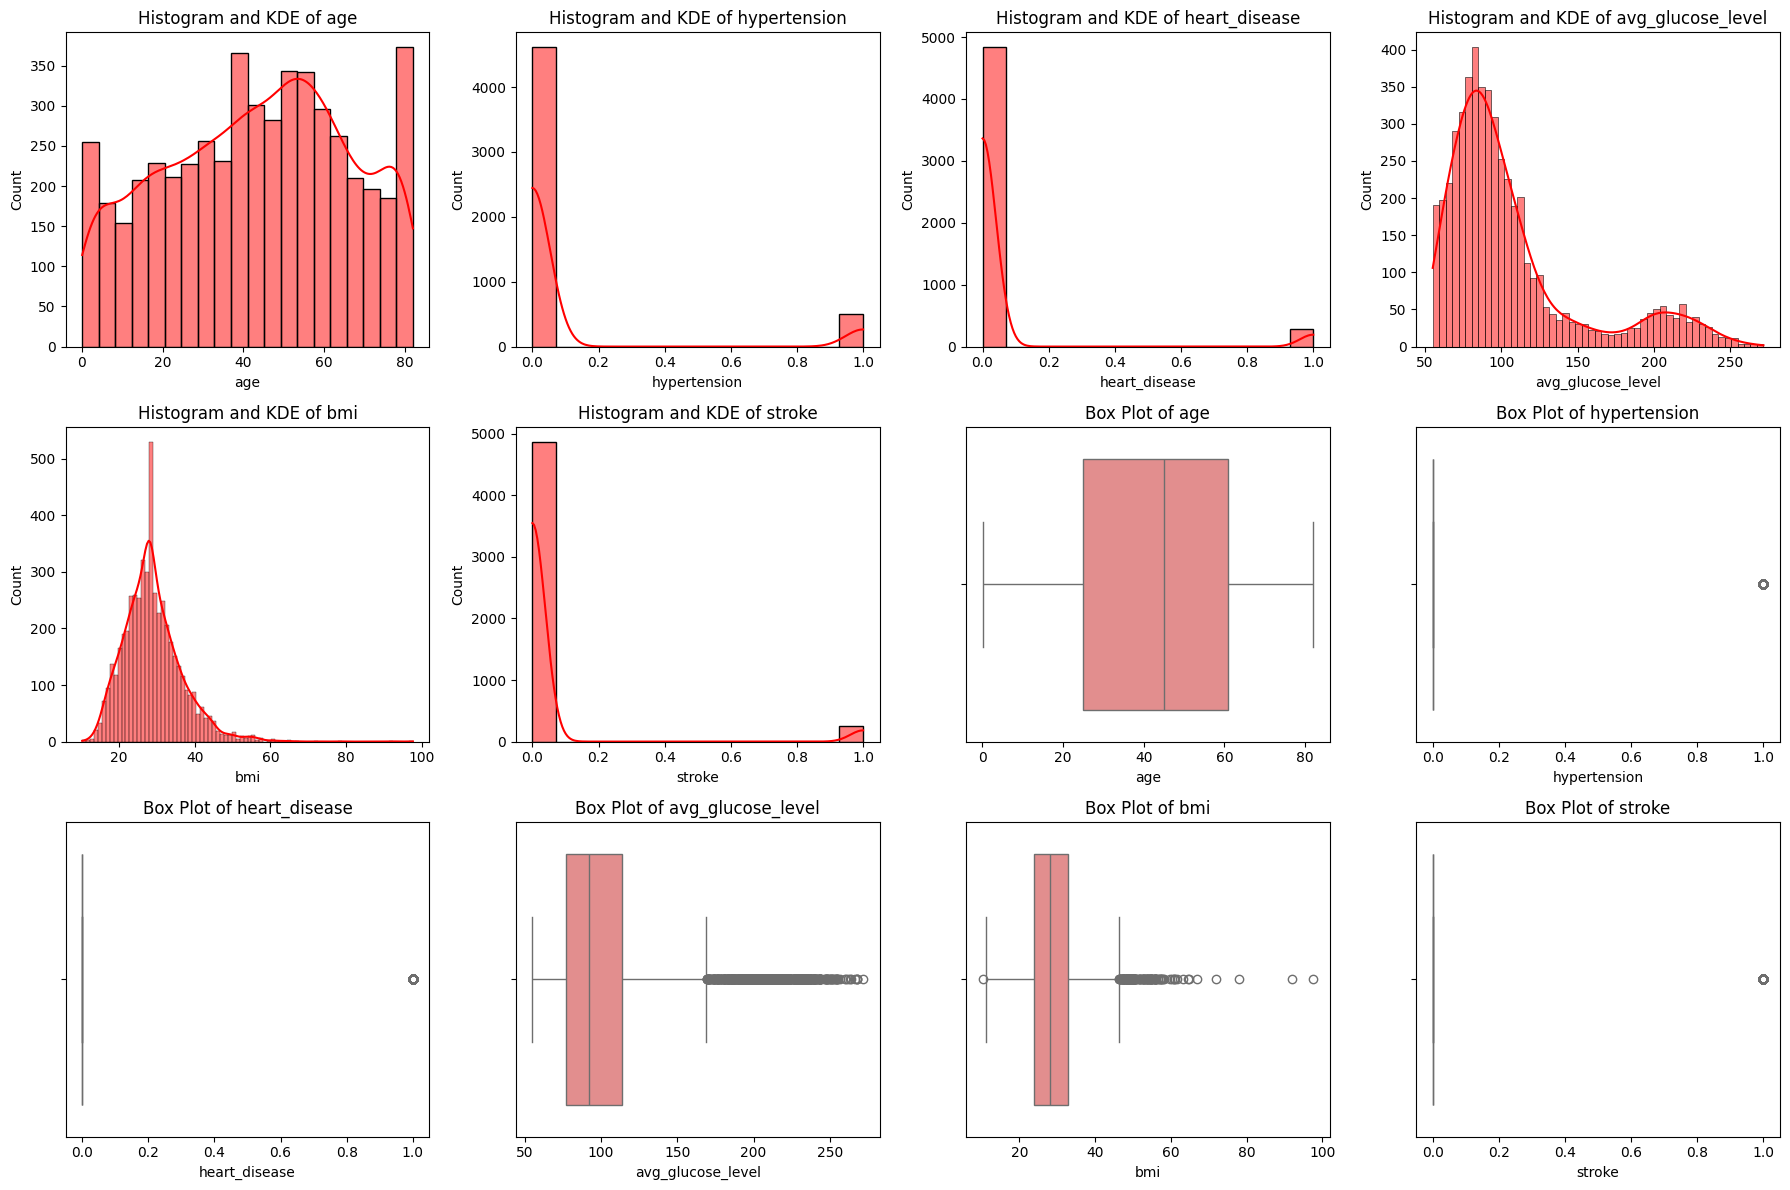

In [698]:
import scipy.stats as stats

# Set up a larger figure size for clarity
plt.figure(figsize=(18, 12))

# Histogram and Box Plot for each numerical column####A histogram is a graph that uses bars to show how a numeric variable's values are distributed
for i, col in enumerate(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True, color="red", edgecolor="black")
    plt.title(f"Histogram and KDE of {col}")####A kernel density estimate (KDE) plot is a graph that shows how data is distributed across a range of values

    plt.subplot(3, 4, i + 7)
    sns.boxplot(x=data[col], color="lightcoral")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()



#### The above figures showing the histogram and boxplot of variables. 

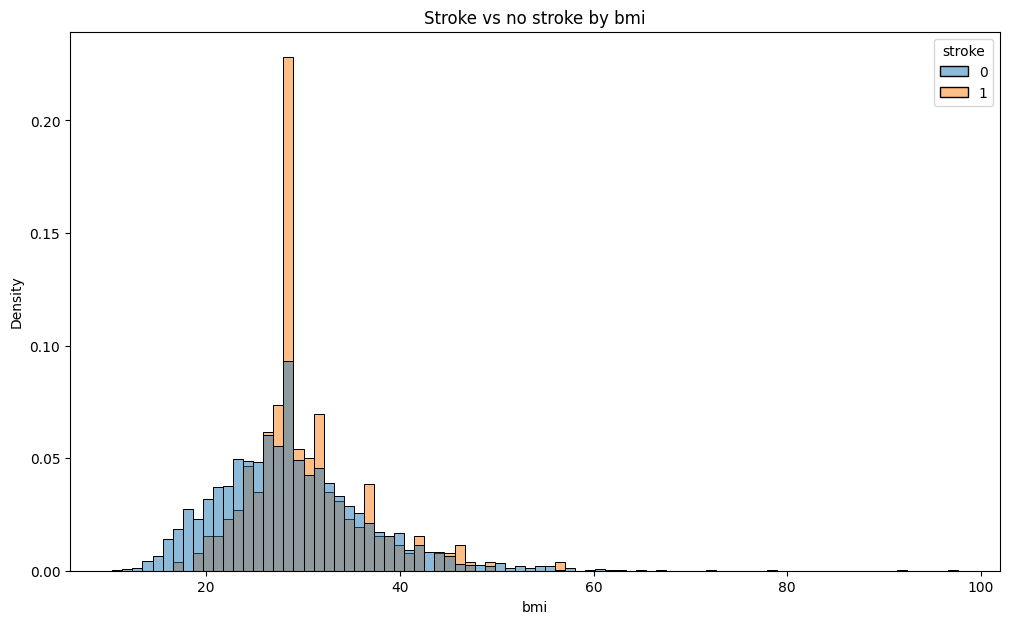

In [699]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='bmi', hue='stroke', element= 'bars', stat='density', common_norm= False,alpha =0.5 )
plt.title('Stroke vs no stroke by bmi')
plt.show()

In [700]:
#### the graph shows bmi is slightly right skewed. bmi in the rahge of 20 and 40 is having high risk of stroke.

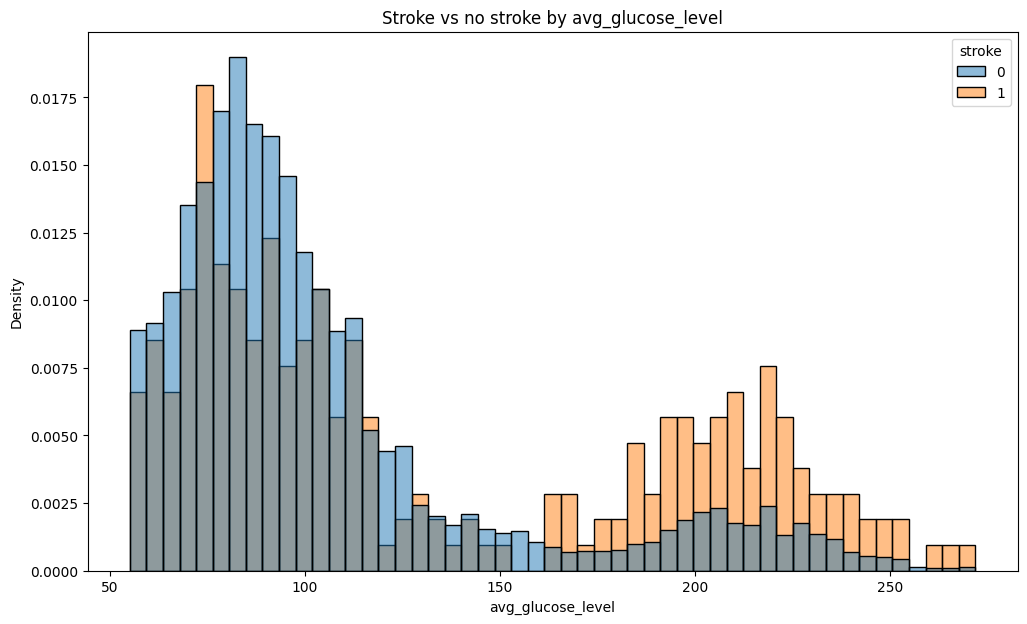

In [701]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='avg_glucose_level', hue='stroke', element= 'bars', stat='density', common_norm= False, alpha=0.5 )
plt.title('Stroke vs no stroke by avg_glucose_level')
plt.show()

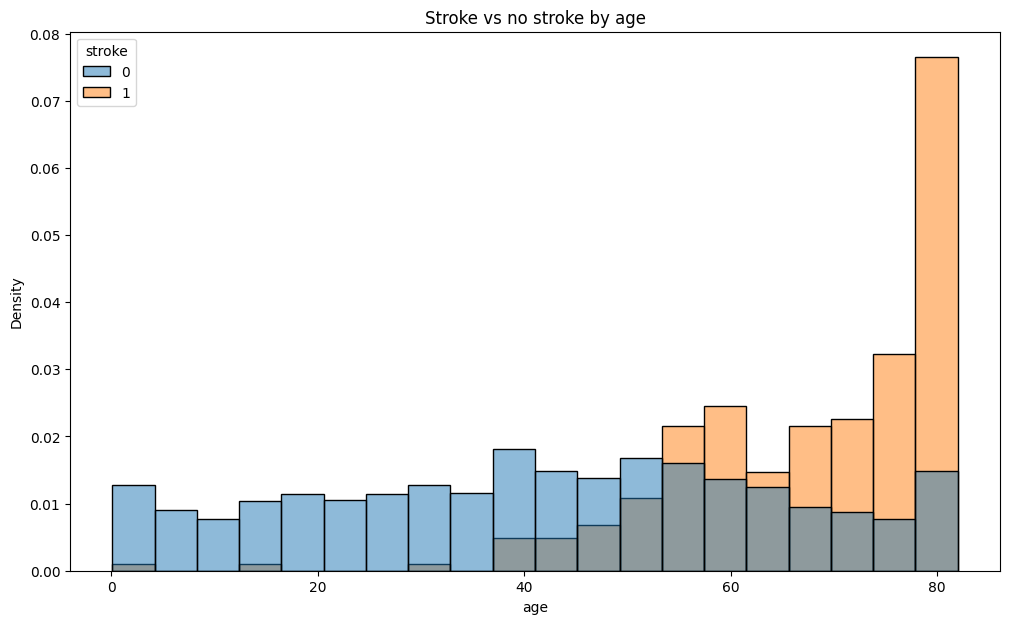

In [702]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='age', hue='stroke', element= 'bars', stat='density', common_norm= False, alpha =0.5 )
plt.title('Stroke vs no stroke by age')
plt.show()

##### The above bar graphs showing the distribution of stroke based on age, average glucose level, bmi. As per the dataset, People having bmi between 20 and 40 is showing the high chance of getting stroke. When the glucose level increases , the chance of  getting stroke also increase.Poeple aged above 50 shows the risk of stroke.

In [703]:
# Correlation matrix
correlation_matrix = data[numerical_cols].corr()
correlation_matrix


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


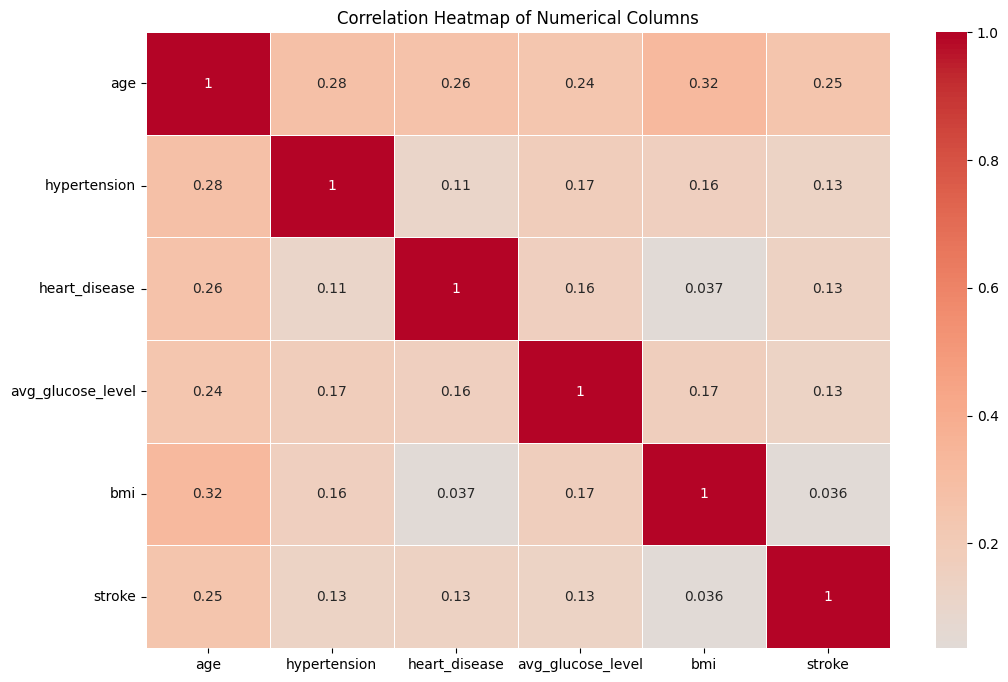

In [704]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

##### The correlation map is showing positive correlation among numerical variables. 0.037  between bmi and heart disease is very close to zero, so it indicates that BMI has a minimal linear association with heart disease based on this data. Since the correlation is so low, this relationship is very weak. Also a very weak positive correlation of 0.11 is shown between heart disease and hypertension. This indicates a very mild relationship between hypertension and heart disease. The number suggests that while there might be a slight trend where people with hypertension are more likely to have heart disease, the strength of the association is minimal. the value 0.32 between bmi and age  indicates a moderate positive correlation, meaning that, in general, as age increases, BMI tends to increase as well, but the relationship isn't very strong.


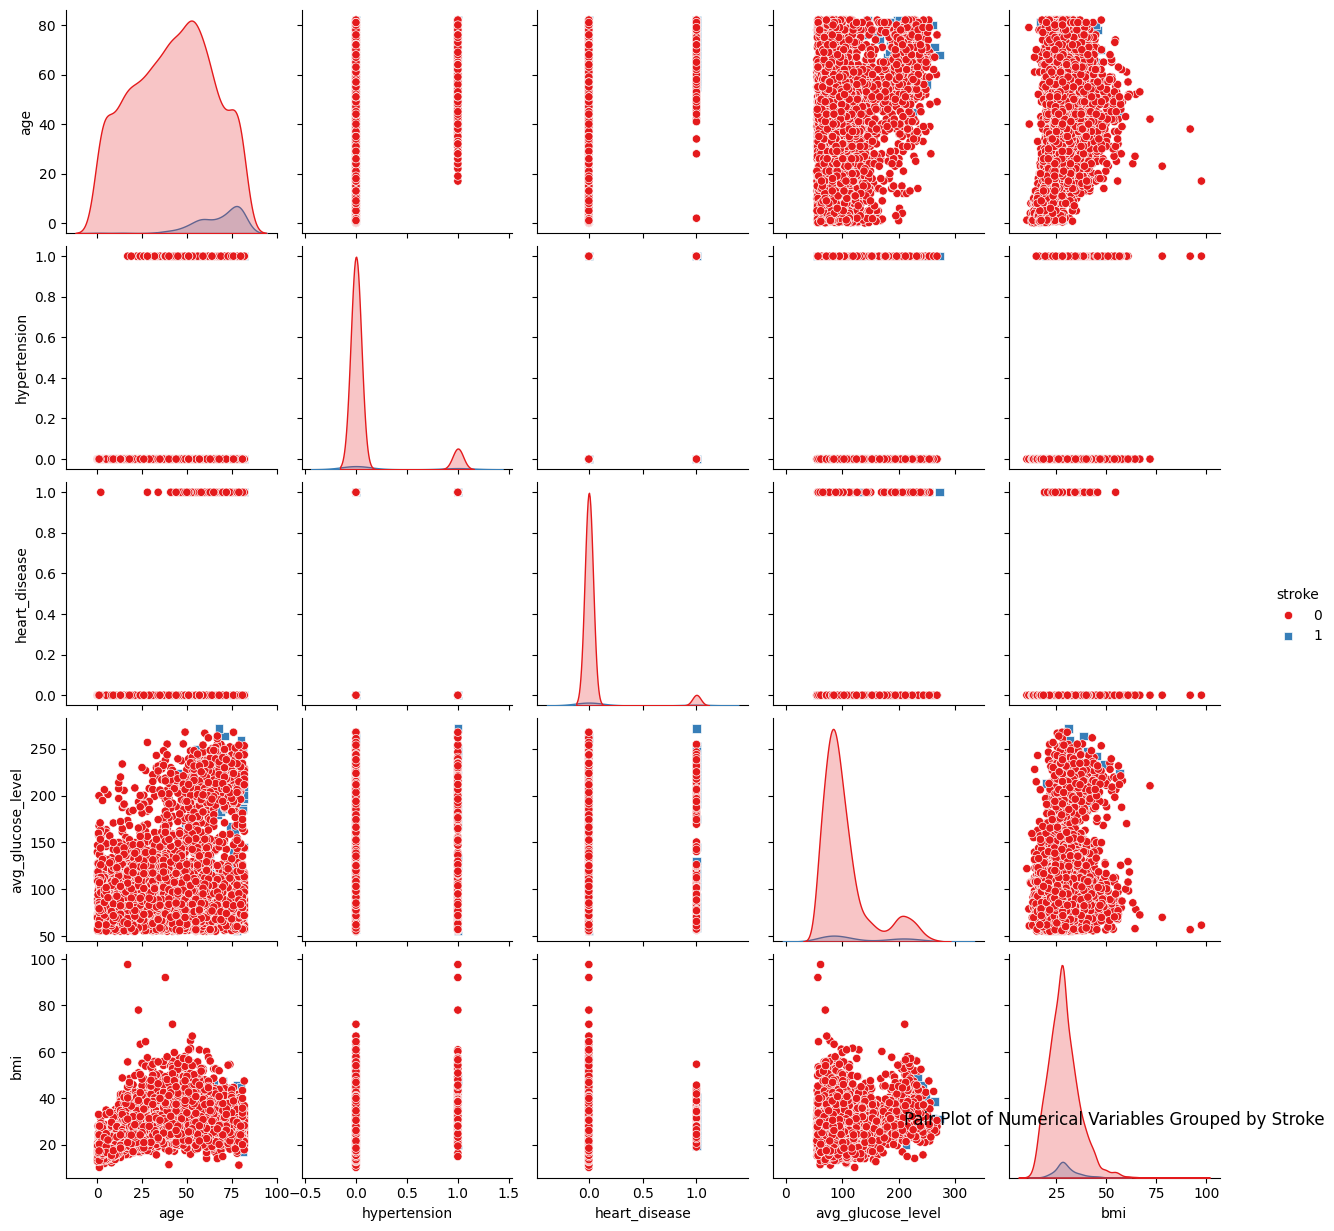

In [705]:
# Pair Plot for Detailed Pairwise Relationships
sns.pairplot(data, hue="stroke", palette="Set1", diag_kind="kde", markers=["o", "s"])
plt.title("Pair Plot of Numerical Variables Grouped by Stroke",y=0.2)
plt.show()

#### From the pair plot we can infer that people with certain ranges in age and glucoselevel  might be at higher stroke risk, visible as clusters in the plot.

### Scatter plots

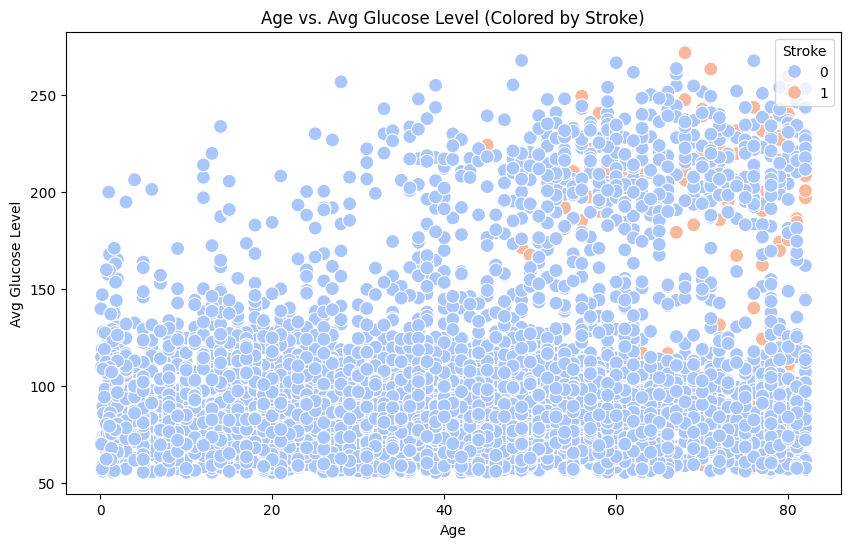

In [706]:

#This scatter plot can help identify any trends in glucose levels across different ages, with a particular focus on individuals who have had a stroke.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=data, palette="coolwarm", edgecolor="w", s=100)
plt.title("Age vs. Avg Glucose Level (Colored by Stroke)")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.legend(title="Stroke", loc="upper right")
plt.show()


#### Plot Shows if age and glucose levels are related to stroke. Higher glucose levels in older individuals appear more often in stroke cases.High glucose in older individuals might be an indicator for stroke risk

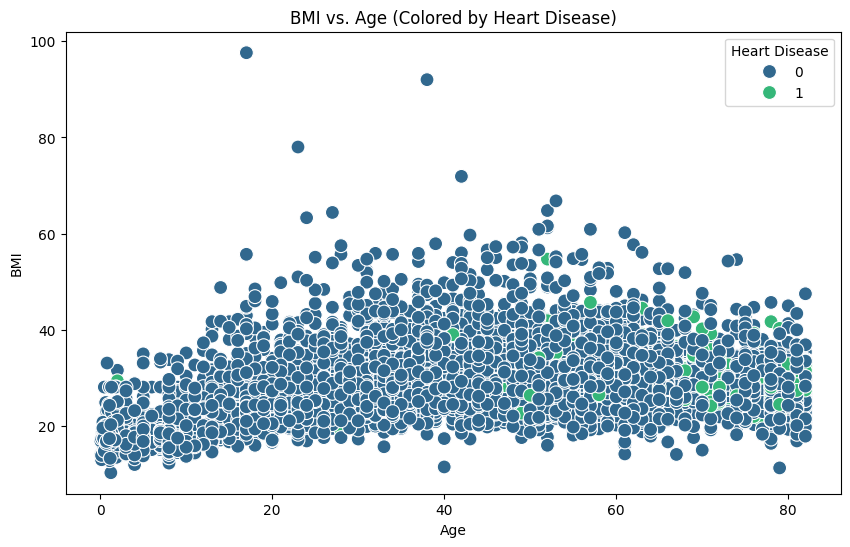

In [707]:

#This plot will help reveal any relationship between age and BMI, and indicate if heart disease occurrences increase with age or BMI.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='heart_disease', data=data, palette="viridis", edgecolor="w", s=100)
plt.title("BMI vs. Age (Colored by Heart Disease)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Heart Disease", loc="upper right")
plt.show()


#### Plot Shows if age and BMI are related to heart disease. Higher BMI in older people might be linked to heart disease. Controlling BMI, especially in older adults, could help lower heart disease risk.

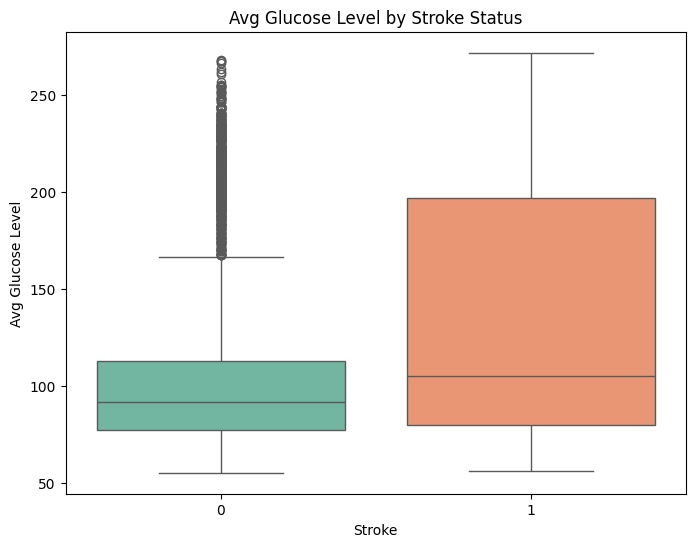

In [708]:
# This box plot shows how average glucose levels vary between individuals who have and haven't experienced a stroke.
plt.figure(figsize=(8, 6))
sns.boxplot(x="stroke", y="avg_glucose_level", data=data, palette="Set2")
plt.title("Avg Glucose Level by Stroke Status")
plt.xlabel("Stroke")
plt.ylabel("Avg Glucose Level")
plt.show()

#### Examines if glucose levels vary significantly for people with and without stroke.People with stroke tend to have higher average glucose levels. Elevated glucose could be a marker or risk factor for stroke.

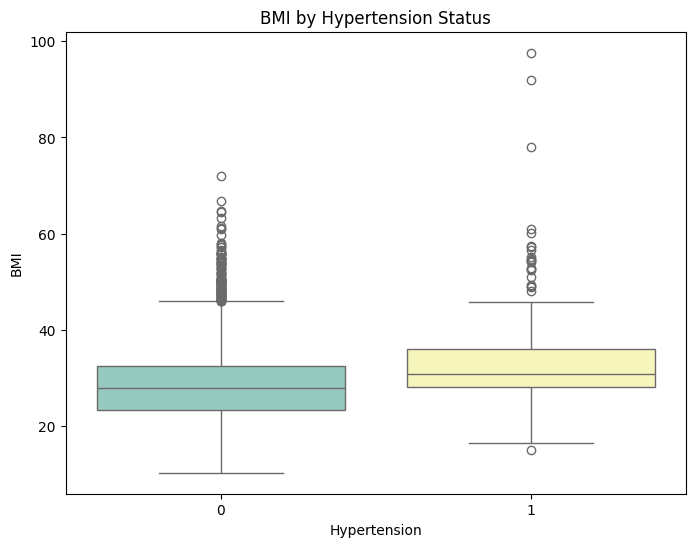

In [709]:
#Box Plot for BMI by Hypertension
#A box plot can help visualize how BMI is distributed among individuals with and without hypertension.
plt.figure(figsize=(8, 6))
sns.boxplot(x="hypertension", y="bmi", data=data, palette="Set3")
plt.title("BMI by Hypertension Status")
plt.xlabel("Hypertension")
plt.ylabel("BMI")
plt.show()


#### Shows if BMI is different in people with and without hypertension. People with hypertension tend to have higher BMI values. Higher BMI may contribute to hypertension risk, highlighting weight management’s importance.(which means body weight has to be controlled to lower the risk of hypertension).

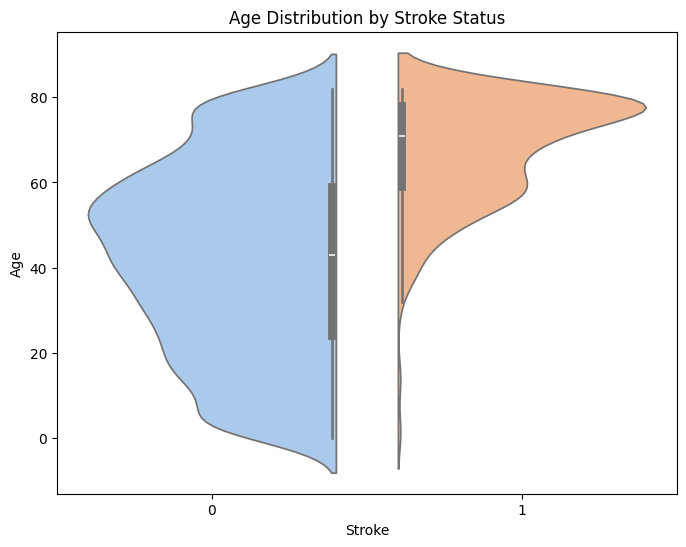

In [710]:
# Violin Plot for Age Distribution by Stroke Status
#Violin plots combine aspects of box plots and KDE plots, showing the distribution, density, and range of a variable across categories.
plt.figure(figsize=(8, 6))
sns.violinplot(x="stroke", y="age", data=data, palette="pastel", split=True)
plt.title("Age Distribution by Stroke Status")
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.show()


#### Shows the age range where strokes are more common. Stroke cases seem more frequent in certain age groups, especially older adults. Age is an important factor in stroke risk, with higher impact in older individuals.

#### Age-Related Health Risks: Older age is linked to higher rates of stroke and heart disease.Glucose Levels and Stroke: Elevated glucose is more common in stroke cases, suggesting it’s a risk factor.BMI and Hypertension: Higher BMI often correlates with hypertension, so managing weight could lower blood pressure risks.

### 3. Box plot of numerical columns and their outlier treatment

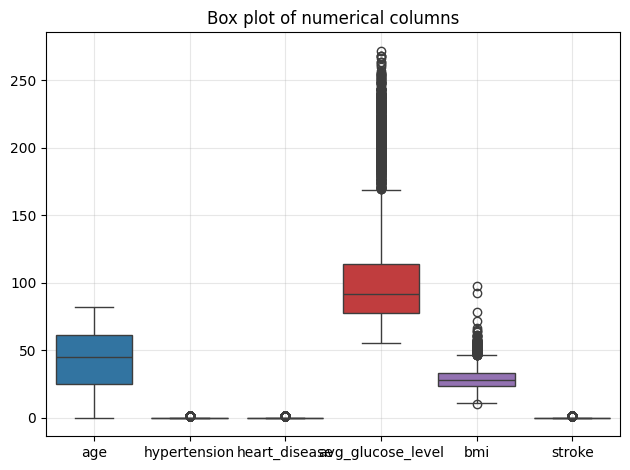

In [711]:
##Numerical Columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

sns.boxplot(data[numerical_cols])
plt.title('Box plot of numerical columns')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### The box plot shows there are outliers present in avg_glucose_level and bmi columns. Outliers are treated using capping method.nnn7 


###  4. Outlier capping  using IQR method

In [712]:
capped_cols = ['bmi', 'avg_glucose_level']

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in capped_cols:
    data = cap_outliers_iqr(data, col)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.6,formerly smoked,0


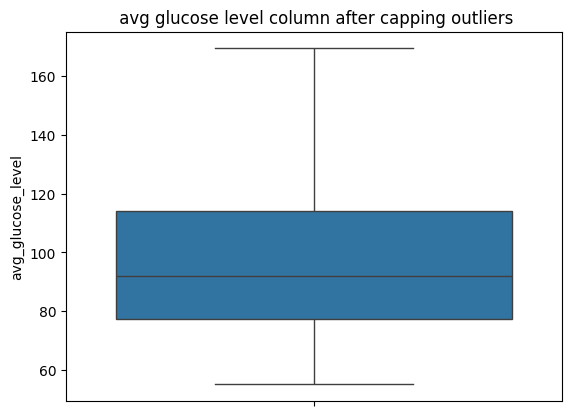

In [713]:
sns.boxplot(data['avg_glucose_level'])
plt.title(" avg glucose level column after capping outliers")
plt.show()

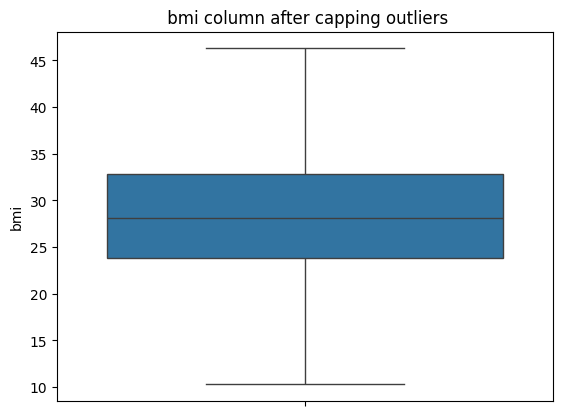

In [714]:
sns.boxplot(data['bmi'])
plt.title(" bmi column after capping outliers")
plt.show()

In [715]:
print("\nSkewness of avg_glucose_level:")
print(data['avg_glucose_level'].skew())
print("\nSkewness of bmi:")
print(data['bmi'].skew())
print("\nKurtosis of avg_glucose_level:")
print(data['avg_glucose_level'].kurt())
print("\nKurtosis of bmi:")
print(data['bmi'].kurt())


Skewness of avg_glucose_level:
0.9353541417010974

Skewness of bmi:
0.4492475685365505

Kurtosis of avg_glucose_level:
-0.1735271998716721

Kurtosis of bmi:
-0.07685185042990472


### 5.Label encoding

In [716]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [717]:
from sklearn.preprocessing import LabelEncoder
###(assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.)
label_encoder = LabelEncoder()
data['gender']=label_encoder.fit_transform(data['gender'])
data['work_type']=label_encoder.fit_transform(data['work_type'])
data['Residence_type']=label_encoder.fit_transform(data['Residence_type'])
data['ever_married']=label_encoder.fit_transform(data['ever_married'])
data['smoking_status']=label_encoder.fit_transform(data['smoking_status'])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.2000,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.9900,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.2900,25.6,1,0


### 6. Scaling the features

In [718]:
scaler = StandardScaler()
### (normalise the features in the dataset-xi-xmean / sigma ) value between 0 and 1
scaler.fit(data)
scaled_data_ss = scaler.transform(data)
scaled_data_ss

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  1.11087215,
        -0.35178071,  4.41838074],
       [-0.840344  ,  0.78607007, -0.32860186, ..., -0.08292101,
         0.58155233,  4.41838074],
       [ 1.18807255,  1.62639008, -0.32860186, ...,  0.53504251,
         0.58155233,  4.41838074],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ...,  0.26819463,
         0.58155233, -0.22632726],
       [ 1.18807255,  0.34379639, -0.32860186, ..., -0.43403664,
        -0.35178071, -0.22632726],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.34976889,
        -1.28511375, -0.22632726]])

### 7. Modelling the dataset

In [719]:
from sklearn.model_selection import train_test_split
# Define the target and features
X=data.drop(['stroke'],axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [720]:
print(X.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               1           169.3575  36.6               1  
1               0           169.3575  28.1               2  
2               0           105.9200  32.5               2  
3               1           169.3575  34.4               3  
4               0           169.3575  24.0               2  


In [721]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [722]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


### 1. Logistic regression model

In [723]:
from sklearn.linear_model import LogisticRegression     ###for binary classification 
model = LogisticRegression()

In [724]:
model.fit(X_train, y_train)

LogisticRegression()

In [725]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.00,0,0,0,3,0,64.85,23.0,0
4478,1,40.00,0,0,1,3,0,65.29,28.3,2
3849,0,8.00,0,0,0,4,1,74.42,22.5,0
4355,0,79.00,1,0,1,3,0,76.64,19.5,2
3826,0,75.00,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
3605,1,1.88,0,0,0,4,0,143.97,28.1,0
4934,1,1.32,0,0,0,4,0,107.02,28.1,0
4835,1,49.00,1,0,1,3,0,119.30,30.4,1
4105,0,56.00,0,0,0,3,1,128.63,24.9,3


In [726]:
y_predicted = model.predict(X_test)

In [727]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [728]:
model.predict_proba(X_test)

array([[0.98486125, 0.01513875],
       [0.99340533, 0.00659467],
       [0.99318926, 0.00681074],
       ...,
       [0.96944288, 0.03055712],
       [0.91667111, 0.08332889],
       [0.75512307, 0.24487693]])

In [729]:
model.score(X_test,y_test)

0.9393346379647749

In [730]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.00,0,0,0,3,0,64.85,23.0,0
4478,1,40.00,0,0,1,3,0,65.29,28.3,2
3849,0,8.00,0,0,0,4,1,74.42,22.5,0
4355,0,79.00,1,0,1,3,0,76.64,19.5,2
3826,0,75.00,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
3605,1,1.88,0,0,0,4,0,143.97,28.1,0
4934,1,1.32,0,0,0,4,0,107.02,28.1,0
4835,1,49.00,1,0,1,3,0,119.30,30.4,1
4105,0,56.00,0,0,0,3,1,128.63,24.9,3


#### Predict using the model

In [731]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[959,   1],
       [ 61,   1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

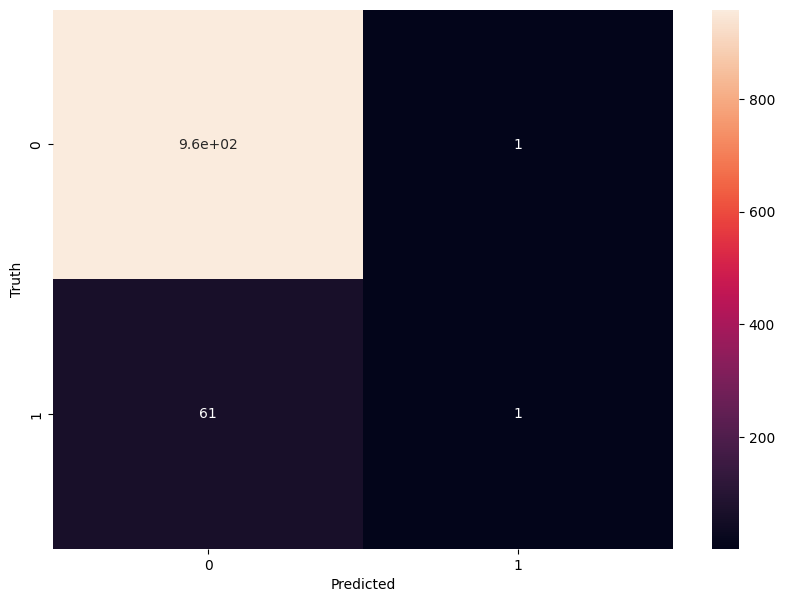

In [732]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [733]:
# True Positives (TP)
TP = cm[1, 1]

# True Negatives (TN)
TN = cm[0, 0]

# False Positives (FP)
FP = cm[0, 1]

# False Negatives (FN)
FN = cm[1, 0]

# Accuracy
accuracy = (TP + TN) / np.sum(cm)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)
print("TP:", TP)
print("FP:", FP)


Accuracy: 0.9393346379647749
Precision: 0.5
Recall: 0.016129032258064516
Specificity: 0.9989583333333333
F1 Score: 0.03125
False Positive Rate: 0.0010416666666666667
False Negative Rate: 0.9838709677419355
TP: 1
FP: 1


##### The accuracy of 0.93 indicates that the model is correct about 93.93% of the time.model.

#### 2.SVR(###predicts values using hyperplane)

In [734]:
from sklearn.model_selection import train_test_split
# Define the target and features
X=data.drop(['stroke'],axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [735]:
from sklearn.svm import SVC

svc_model=SVC(kernel='rbf',C=3)
svc_model.fit(X_train, y_train)

SVC(C=3)

In [736]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svc_pred = svc_model.predict(X_test)
print("Accuracy score :",accuracy_score(y_test, svc_pred))
print("Precision : ",precision_score(y_test,svc_pred))
print("Recall : ",recall_score(y_test,svc_pred))
print("F1 score : ",f1_score(y_test,svc_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test,svc_pred))

Accuracy score : 0.9393346379647749
Precision :  0.0
Recall :  0.0
F1 score :  0.0
Confusion matrix :
[[960   0]
 [ 62   0]]


In [737]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='f1_macro')

#F1 macro computes the F1 score for each class separately and then averages them, giving equal weight to each class.
#This is useful when you have class imbalance.

# Calculate mean F1 score 
mean_f1 = np.mean(scores)

print("5 fold cross validation")
print(f'Mean F1 Score: {mean_f1:.2f}')

5 fold cross validation
Mean F1 Score: 0.49


#### 3. Random forest classifier(multiple decision trees to classify data)

In [738]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [739]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#### Decision tree model

In [740]:
# fit a decision tree model
dclf=DecisionTreeClassifier()
dclf.fit(X_train,y_train)
dclf_pred=dclf.predict(X_test)
print(accuracy_score(y_test,dclf_pred))

0.901174168297456


#### Random forest model

In [741]:
# fit a random forest model
# By default, n_estimators = 100 . ie, 100 number of trees in the forest.

rclf=RandomForestClassifier()
rclf.fit(X_train,y_train)
rclf_pred=rclf.predict(X_test)
print(accuracy_score(y_test,rclf_pred))

0.9393346379647749


### 4.adaboost classifier(combine weak classifiers to create  a strong classifier)

In [742]:
# Fit a AdaBoost model
aclf=AdaBoostClassifier(n_estimators=100)
aclf.fit(X_train,y_train)
aclf_pred=aclf.predict(X_test)
print(accuracy_score(y_test,aclf_pred))

0.9383561643835616


### 5. Gradient boost classifier(each output is corrected from the mistakes of the previous output)

In [743]:
# Fit a GradientBoosting model
gclf=GradientBoostingClassifier(n_estimators=100)
gclf.fit(X_train,y_train)
gclf_pred=gclf.predict(X_test)
print(accuracy_score(y_test,gclf_pred))

0.9403131115459883


In [744]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [745]:
print("Precision")
print("Decision tree : ",precision_score(y_test,dclf_pred))
print("Random forst : ",precision_score(y_test,rclf_pred))
print("Adaboost : ",precision_score(y_test,aclf_pred))
print("GradientBoost : ",precision_score(y_test,gclf_pred))


Precision
Decision tree :  0.18032786885245902
Random forst :  0.5
Adaboost :  0.0
GradientBoost :  1.0


In [746]:
print("Recall")
print("Decision tree : ",recall_score(y_test,dclf_pred))
print("Random forst : ",recall_score(y_test,rclf_pred))
print("Adaboost : ",recall_score(y_test,aclf_pred))
print("GradientBoost : ",recall_score(y_test,gclf_pred))


Recall
Decision tree :  0.1774193548387097
Random forst :  0.016129032258064516
Adaboost :  0.0
GradientBoost :  0.016129032258064516


In [747]:
print("F1 score")
print("Decision tree : ",f1_score(y_test,dclf_pred))
print("Random forst : ",f1_score(y_test,rclf_pred))
print("Adaboost : ",f1_score(y_test,aclf_pred))
print("GradientBoost : ",f1_score(y_test,gclf_pred))


F1 score
Decision tree :  0.17886178861788618
Random forst :  0.03125
Adaboost :  0.0
GradientBoost :  0.031746031746031744


In [748]:
print("confusion matrix")
print("Decision tree : ")
print(confusion_matrix(y_test,dclf_pred))
print("Random forst : ")
print(confusion_matrix(y_test,rclf_pred))
print("Adaboost : ")
print(confusion_matrix(y_test,aclf_pred))
print("GradientBoost : ")
print(confusion_matrix(y_test,gclf_pred))


confusion matrix
Decision tree : 
[[910  50]
 [ 51  11]]
Random forst : 
[[959   1]
 [ 61   1]]
Adaboost : 
[[959   1]
 [ 62   0]]
GradientBoost : 
[[960   0]
 [ 61   1]]


In [749]:
print("classification_report")
print("Decision tree : ")
print(classification_report(y_test,dclf_pred))
print("Random forst : ")
print(classification_report(y_test,rclf_pred))
print("Adaboost : ")
print(classification_report(y_test,aclf_pred))
print("GradientBoost : ")
print(classification_report(y_test,gclf_pred))


classification_report
Decision tree : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.18      0.18      0.18        62

    accuracy                           0.90      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.90      0.90      0.90      1022

Random forst : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

Adaboost : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighte

#### ROC curves(how a model performs at different threshold)


#### ROC curve for Logistic Regression and Random forest classifier

In [750]:
from sklearn.metrics import roc_auc_score


In [751]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [752]:
# Initialize classifiers
classifier1 = LogisticRegression()
classifier2 = RandomForestClassifier()

# Fit classifiers on training data
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

# Predict probabilities on test data
probs1 = classifier1.predict_proba(X_test)[:, 1]
probs2 = classifier2.predict_proba(X_test)[:, 1]

# Calculate AUC for classifier 1
auc1 = roc_auc_score(y_test, probs1)

# Calculate AUC for classifier 2
auc2 = roc_auc_score(y_test, probs2)

print("AUC for Classifier 1:", auc1)
print("AUC for Classifier 2:", auc2)


AUC for Classifier 1: 0.8397345430107527
AUC for Classifier 2: 0.8085265456989248


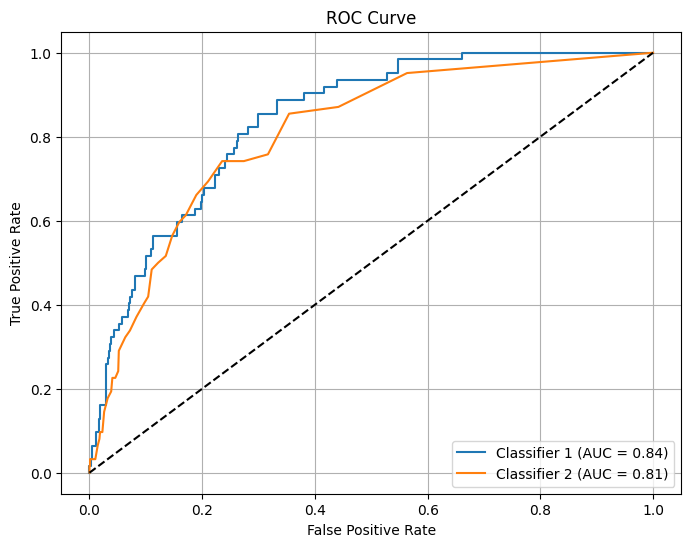

In [753]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve for classifier 1
fpr1, tpr1, _ = roc_curve(y_test, probs1)

# Compute ROC curve for classifier 2
fpr2, tpr2, _ = roc_curve(y_test, probs2)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Classifier 1 (AUC = {:.2f})'.format(auc1))
plt.plot(fpr2, tpr2, label='Classifier 2 (AUC = {:.2f})'.format(auc2))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


###### Classifier 1 (AUC = 0.84): Shows strong  discrimination capability.

###### Classifier 2 (AUC = 0.81): Also performs well but less than classifier 1.
###### normally auc value ranges from 0 and 1. 
###### The classifiers are effective for stroke prediction.

#### ROC curve for SVC

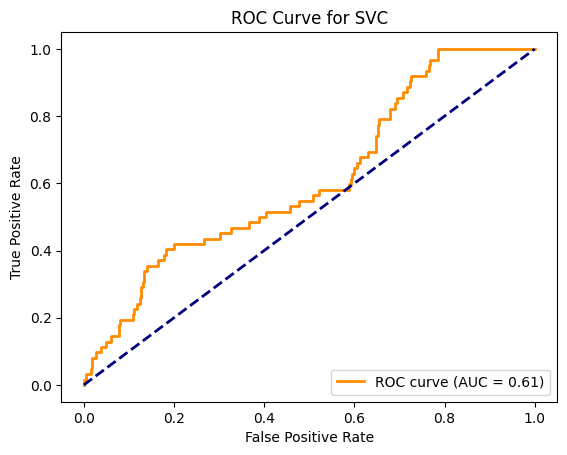

AUC value is: 0.6116935483870968


In [754]:
from sklearn.metrics import roc_curve, auc

# Predict decision function scores
y_scores = svc_model.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc="lower right")
plt.show()
print("AUC value is:", roc_auc)


##### Here AUC = 0.61. An AUC (Area Under the Curve) of 0.61 means that the model has a 61% chance of ranking a randomly chosen positive instance higher than a randomly chosen negative instance. This model has some predictive ability, but it's relatively weak.


### ROC curve for adaboost classifier

In [755]:
y_scores = aclf.predict_proba(X_test)[:, 1]


In [756]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

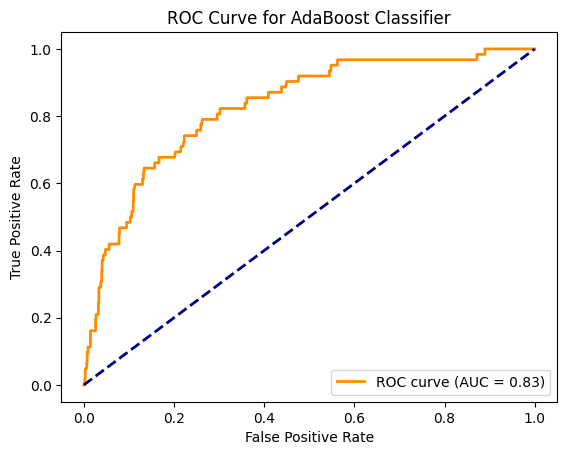

AUC values is: 0.8286878360215054


In [757]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()
print("AUC values is:", roc_auc)

###### If a ROC curve is above the threshold margin, it means the model is performing better than a random guess and can distinguish between positive 

###### and negative classes to a certain degree; the higher the curve is above the threshold, the better the model's performance is considered to be. ###### Here with an AUC of 0.83 ada boost classifier model can distinguish between classes similar to logistic regression model. 

### ROC curve for  Gradient boost classifier

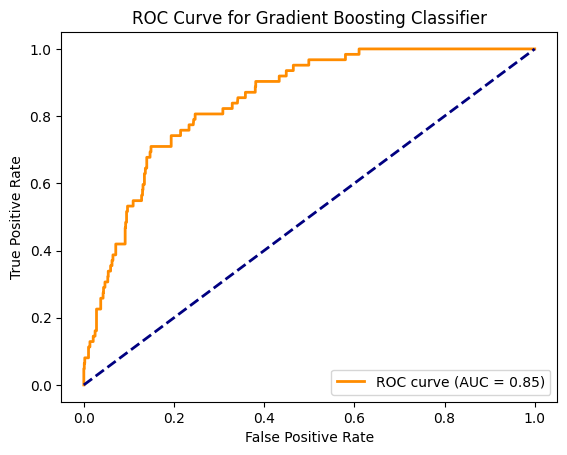

In [758]:
# Get probability scores for the positive class
y_scores = gclf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()


###### Here also  AUC of 0.85 suggests that the model has the best ability to discriminate between the positive and negative classes among the other for classifiers.

##### Based on accuracy score and AUC values, comparatively gradient boost classifier can be the best model to predict the possibility of stroke. 

### Conclusion

#### The findings emphasize the importance of monitoring key risk factors such as hypertension, heart disease, and glucose levels when assessing stroke risk.These variables, along with demographic factors like age, marital status, and smoking habits, are significant predictors of stroke occurrence. All the features, in one way or other are interrelated to predict the occurence of stroke. This analysis can guide preventive measures and help in the development of targeted healthcare interventions.                                             
                                                                                                                                                                                               

### Suggestions

#### Future work could focus on improving predictive models by integrating more data and exploring other machine learning techniques for enhanced stroke prediction.